In [1]:
import sys
sys.path.append('../../Python')
import cv2
import os
import numpy as np
from util import *
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def load_images_from_folder(folder,imageset):
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            imageset.append(img)
    return imageset

In [3]:
image_train = []
for folder in os.listdir('C:\\Users\\lyum\\MA490DeepLearning\\gestures'):
    load_images_from_folder('C:\\Users\\lyum\\MA490DeepLearning\\gestures\\' + folder,image_train)

In [4]:
image_train = np.array(image_train)
image_train.shape

(13200, 50, 50, 3)

In [5]:
labels = []
for i in range(1,12):
    for j in range(1200):
        labels.append(i)

In [6]:
labels_train = np.array(labels)
labels_train.shape

(13200,)

In [7]:
m = image_train.shape[0]
perm = np.random.permutation(m)
image_train = image_train[perm]
labels_train = labels_train[perm]

In [14]:
image_train1 = image_train[0:1000,:,:,:]
image_train2 = image_train[0:1000,:,:,:]
image_train3 = image_train[0:1000,:,:,:]
labels_train = labels_train[0:1000]
l = np.vstack((image_train1,image_train2,image_train3))
l.shape

(3000, 50, 50, 3)

In [9]:
vgg16 = Sequential(VGG16(weights = 'imagenet',input_shape = (50,50,3),include_top = False))
vgg16.add(Flatten())
vgg16.add(Dense(12,activation = 'relu'))
vgg16.add(Dense(12,activation = 'softmax'))
vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 12)                6156      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
Total params: 14,721,000
Trainable params: 14,721,000
Non-trainable params: 0
_________________________________________________________________


In [10]:
# freeze weights of convolution layers
vgg16.layers[0].trainable = False
vgg16.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'Adam',
             metrics = ['accuracy'])
vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 12)                6156      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
Total params: 14,721,000
Trainable params: 6,312
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
# save model
checkpt = ModelCheckpoint('TransferLearning_DogsCats.h5',save_best_only=True,verbose=2)

In [12]:
hist = vgg16.fit(image_train,labels_train,
                epochs=100,
                verbose=2,
                validation_split=0.2,
                callbacks= [checkpt])

Train on 800 samples, validate on 200 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 2.31198, saving model to TransferLearning_DogsCats.h5
800/800 - 14s - loss: 4.6850 - accuracy: 0.2450 - val_loss: 2.3120 - val_accuracy: 0.3850
Epoch 2/100

Epoch 00002: val_loss improved from 2.31198 to 1.71240, saving model to TransferLearning_DogsCats.h5
800/800 - 13s - loss: 1.8664 - accuracy: 0.4225 - val_loss: 1.7124 - val_accuracy: 0.4500
Epoch 3/100

Epoch 00003: val_loss improved from 1.71240 to 1.42717, saving model to TransferLearning_DogsCats.h5
800/800 - 13s - loss: 1.5349 - accuracy: 0.4863 - val_loss: 1.4272 - val_accuracy: 0.5350
Epoch 4/100

Epoch 00004: val_loss improved from 1.42717 to 1.10469, saving model to TransferLearning_DogsCats.h5
800/800 - 13s - loss: 1.2394 - accuracy: 0.5663 - val_loss: 1.1047 - val_accuracy: 0.6450
Epoch 5/100

Epoch 00005: val_loss improved from 1.10469 to 0.92389, saving model to TransferLearning_DogsCats.h5
800/800 - 13s - loss: 0.9459

Epoch 45/100

Epoch 00045: val_loss did not improve from 0.02629
800/800 - 14s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0282 - val_accuracy: 0.9900
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.02629
800/800 - 12s - loss: 9.6240e-04 - accuracy: 1.0000 - val_loss: 0.0281 - val_accuracy: 0.9900
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.02629
800/800 - 13s - loss: 9.2042e-04 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9900
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.02629
800/800 - 12s - loss: 8.8212e-04 - accuracy: 1.0000 - val_loss: 0.0288 - val_accuracy: 0.9900
Epoch 49/100

Epoch 00049: val_loss did not improve from 0.02629
800/800 - 13s - loss: 8.4445e-04 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9900
Epoch 50/100

Epoch 00050: val_loss did not improve from 0.02629
800/800 - 13s - loss: 8.1139e-04 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9900
Epoch 51/100

Epoch 00051: val_loss did not improv

Epoch 97/100

Epoch 00097: val_loss did not improve from 0.02629
800/800 - 12s - loss: 1.8705e-04 - accuracy: 1.0000 - val_loss: 0.0377 - val_accuracy: 0.9900
Epoch 98/100

Epoch 00098: val_loss did not improve from 0.02629
800/800 - 12s - loss: 1.8262e-04 - accuracy: 1.0000 - val_loss: 0.0378 - val_accuracy: 0.9900
Epoch 99/100

Epoch 00099: val_loss did not improve from 0.02629
800/800 - 13s - loss: 1.7797e-04 - accuracy: 1.0000 - val_loss: 0.0378 - val_accuracy: 0.9900
Epoch 100/100

Epoch 00100: val_loss did not improve from 0.02629
800/800 - 12s - loss: 1.7440e-04 - accuracy: 1.0000 - val_loss: 0.0379 - val_accuracy: 0.9900


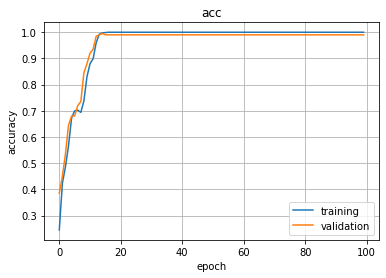

In [13]:
PlotLearningCurvesAcc(hist,'acc')

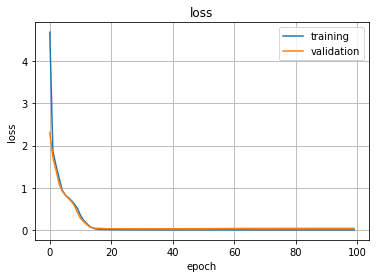

In [14]:
PlotLearningCurvesLoss(hist,'loss')